## Import the Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pybaseball

## Download the Data & Add Year Label & Merge the Tables


In [2]:
data2014 = pybaseball.schedule_and_record(2014, 'TOR')
data2014['Year'] = '2014'

In [3]:
data2015 = pybaseball.schedule_and_record(2015, 'TOR')
data2015['Year'] = '2015'

In [4]:
data2016 = pybaseball.schedule_and_record(2016, 'TOR')
data2016['Year'] = '2016'

In [5]:
data2017 = pybaseball.schedule_and_record(2017, 'TOR')
data2017['Year'] = '2017'

In [6]:
data = pd.concat([data2014, data2015, data2016, data2017], axis=0, join='outer', join_axes=None, ignore_index=True)

## Cleaning the data to work with
- Cleaned the Days so they work as date times. 


#### Potential Future Work
- We may need to clean the playoff games out of the years that TOR made the playoffs, because they will be extra games on the end of the season with 100% capacity. Could bias the accuracy for those seasons. I'm not sure how we find them easily though. 

In [7]:
# Split the Date up
data[['DOW','Cal_Date']] = data['Date'].str.split(',',expand=True)
data[['Blank', 'Month', 'Day', 'Double_Header']] = data['Cal_Date'].str.split('\s', expand=True)

# The whole reason I had to split it up. Python can't cope with single digit day formats. 
data['Day'] = data['Day'].str.zfill(2)

# Compile it all back up and convert to a datetime
data['Date'] = pd.to_datetime((data['Month'] + data['Day'] + data['Year']), format='%b%d%Y')


# Clean up the interim fields I had to make
data = data.drop(['Cal_Date', 'Blank', 'Month', 'Day'], axis=1)

## Filter the data

In [8]:
home_games = data[data['Home_Away'] == 'Home']
home_games.head()

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled,Year,DOW,Double_Header
4,2014-04-04,TOR,Home,NYY,L,3.0,7.0,9.0,2-3,4.0,...,McGowan,None,3:26,N,48197.0,-2,None,2014,Friday,None
5,2014-04-05,TOR,Home,NYY,W,4.0,0.0,9.0,3-3,2.0,...,Pineda,Santos,2:45,D,45446.0,1,None,2014,Saturday,None
6,2014-04-06,TOR,Home,NYY,L,4.0,6.0,9.0,3-4,3.0,...,Hutchison,Robertson,2:57,D,34067.0,-1,None,2014,Sunday,None
7,2014-04-08,TOR,Home,HOU,W,5.0,2.0,9.0,4-4,2.0,...,Oberholtzer,Santos,2:52,N,13123.0,1,None,2014,Tuesday,None
8,2014-04-09,TOR,Home,HOU,W,7.0,3.0,9.0,5-4,1.0,...,Harrell,None,3:09,N,13569.0,2,None,2014,Wednesday,None


## Explore the Data

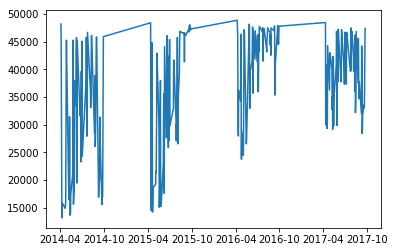

In [9]:
plt.plot(home_games['Date'], home_games['Attendance'])
plt.show()

# Some thoughts on things to look at - MAK
- The percent capacity of home games vs away games
    - this would mean porting in the capacity of the all of the statiums, mapping them to the teams to get the percent capcity
    - This would be interesting because we could then look at the East vs West? 

- Capacity over the year? 
    - 2014 vs 2015 vs 2016 vs 2017 percent capacity
    
- Seasonality of the data
    - We would have to bring in days of the week impact
    - Some complexity here because we would have to line up the days of the week, and we would have to line up the home opener/play offs and I'm not sure how we do that effectively. 